## **CIFAR10 image classification**

### **1. Load the dataset/Preprocess the data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random as python_random
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def set_random_seed(seed_value):
    np.random.seed(seed_value)
    python_random.seed(seed_value)
    tf.random.set_seed(seed_value)

def data_preprocessing(x, y):
  x = np.array(x/255.0, dtype=np.float32)
  y = np.array(y, dtype=np.float32)
  return x, y

def data_one_hot_encoding(x, y):
  x, y = data_preprocessing(x, y)
  y_ohe = to_categorical(y)
  return x, y_ohe

def get_train_valid_test_data(train_x, train_y, test_x, test_y, valid_size=0.15, random_state=42):
  train_x, train_y_ohe = data_one_hot_encoding(train_x, train_y)
  test_x, test_y_ohe = data_one_hot_encoding(test_x, test_y)
  train_x, valid_x, train_y_ohe, valid_y_ohe = train_test_split(train_x, train_y_ohe, test_size=valid_size, random_state=random_state)
  return (train_x, train_y_ohe), (valid_x, valid_y_ohe), (test_x, test_y_ohe)

In [ ]:
from tensorflow.keras.datasets import cifar10

set_random_seed(42)

(train_x, train_y), (test_x, test_y) = cifar10.load_data()
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


### **2. Explore the data**

In [ ]:
train_x[0, :, :, :]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
train_y[0]

array([6], dtype=uint8)

In [ ]:
class_names = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

def show_images(x, y, ncols=5):
  fig, axs = plt.subplots(figsize=(18, 4), nrows=1, ncols=ncols)
  for i in range(ncols):
    axs[i].axis('off')
    axs[i].imshow(x[i])
    y_label = y[i].squeeze()
    axs[i].set_title(f'{class_names[int(y_label)]}', fontsize=12)

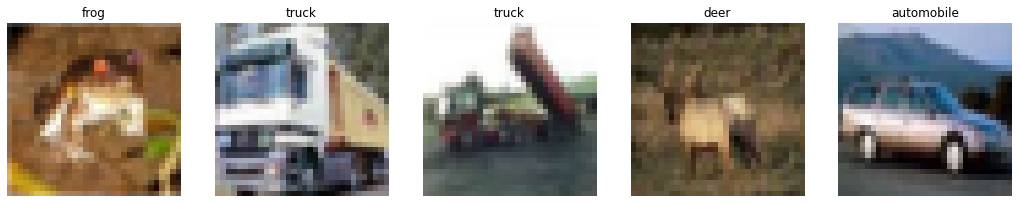

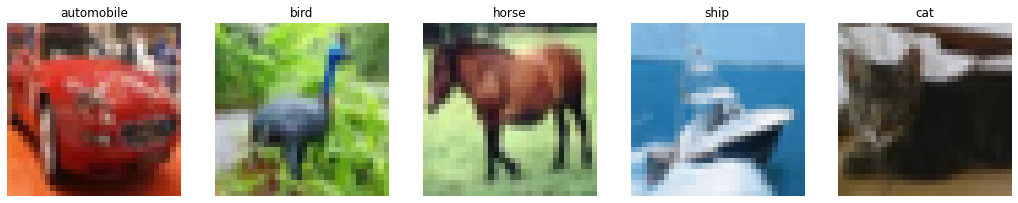

In [ ]:
show_images(train_x[:5], train_y[:5], ncols=5)
show_images(train_x[5:10], train_y[5:10], ncols=5)

In [ ]:
(train_x, train_y_ohe), (valid_x, valid_y_ohe), (test_x, test_y_ohe) = \
get_train_valid_test_data(train_x, train_y, test_x, test_y, valid_size=0.15, random_state=42)
print(train_x.shape, train_y_ohe.shape, valid_x.shape, valid_y_ohe.shape, test_x.shape, test_y_ohe.shape)

(42500, 32, 32, 3) (42500, 10) (7500, 32, 32, 3) (7500, 10) (10000, 32, 32, 3) (10000, 10)


In [ ]:
train_x[0, :, :, :]

array([[[0.15294118, 0.41960785, 0.6666667 ],
        [0.16470589, 0.4392157 , 0.6627451 ],
        [0.18431373, 0.44313726, 0.6666667 ],
        ...,
        [0.6       , 0.68235296, 0.8156863 ],
        [0.6156863 , 0.7019608 , 0.8156863 ],
        [0.6431373 , 0.7254902 , 0.827451  ]],

       [[0.15686275, 0.42745098, 0.6784314 ],
        [0.17254902, 0.44705883, 0.6745098 ],
        [0.19215687, 0.45882353, 0.68235296],
        ...,
        [0.6509804 , 0.7176471 , 0.83137256],
        [0.6509804 , 0.7254902 , 0.81960785],
        [0.6627451 , 0.74509805, 0.8352941 ]],

       [[0.16470589, 0.42745098, 0.6784314 ],
        [0.18039216, 0.44705883, 0.68235296],
        [0.2       , 0.4627451 , 0.6901961 ],
        ...,
        [0.6392157 , 0.70980394, 0.8156863 ],
        [0.6313726 , 0.70980394, 0.8039216 ],
        [0.64705884, 0.73333335, 0.8235294 ]],

       ...,

       [[0.4862745 , 0.63529414, 0.7764706 ],
        [0.5058824 , 0.65882355, 0.8       ],
        [0.47058824, 0

In [ ]:
train_y_ohe[0, :]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### **3. Build the model**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, BatchNormalization

x_size = 32

def create_model():
  input_tensor = Input(shape=(x_size, x_size, 3))
  x = Conv2D(filters=32, kernel_size=3, padding='same')(input_tensor)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(filters=32, kernel_size=3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(2)(x)

  x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(2)(x)

  x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(2)(x)

  x = Flatten()(x)
  x = Dropout(0.5)(x)
  x = Dense(300, activation='relu')(x)
  x = Dropout(0.3)(x)
  output = Dense(10, activation='softmax')(x)
      
  model = Model(inputs=input_tensor, outputs=output)
  return model 

### **4. Compile/Train the model**

In [ ]:
from tensorflow.keras.optimizers import Adam

batch_size = [16, 32, 64, 128, 256, 512]
histories = []
test_losss = []
test_accs = []
for b_size in batch_size:
  model = create_model()
  model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  print(f'batch size : {b_size}')
  history = model.fit(train_x, train_y_ohe, batch_size=b_size, epochs=30, validation_data=(valid_x, valid_y_ohe))
  histories.append(history)

  test_loss, test_acc = model.evaluate(test_x, test_y_ohe)
  test_losss.append(test_loss)
  test_accs.append(test_acc)
  print(f'test accuracy : {test_acc}')

  tf.keras.backend.clear_session()

batch size : 16
Epoch 1/30
2657/2657 [==============================] - 26s 6ms/step - loss: 1.5709 - accuracy: 0.4253 - val_loss: 1.2733 - val_accuracy: 0.5347
Epoch 2/30
2657/2657 [==============================] - 15s 6ms/step - loss: 1.1294 - accuracy: 0.5994 - val_loss: 1.0305 - val_accuracy: 0.6281
Epoch 3/30
2657/2657 [==============================] - 15s 6ms/step - loss: 0.9320 - accuracy: 0.6757 - val_loss: 0.8379 - val_accuracy: 0.7117
Epoch 4/30
2657/2657 [==============================] - 16s 6ms/step - loss: 0.8138 - accuracy: 0.7201 - val_loss: 0.8844 - val_accuracy: 0.7093
Epoch 5/30
2657/2657 [==============================] - 16s 6ms/step - loss: 0.7264 - accuracy: 0.7519 - val_loss: 0.7619 - val_accuracy: 0.7391
Epoch 6/30
2657/2657 [==============================] - 16s 6ms/step - loss: 0.6492 - accuracy: 0.7799 - val_loss: 0.7848 - val_accuracy: 0.7381
Epoch 7/30
2657/2657 [==============================] - 15s 6ms/step - loss: 0.5986 - accuracy: 0.7952 - val_loss:

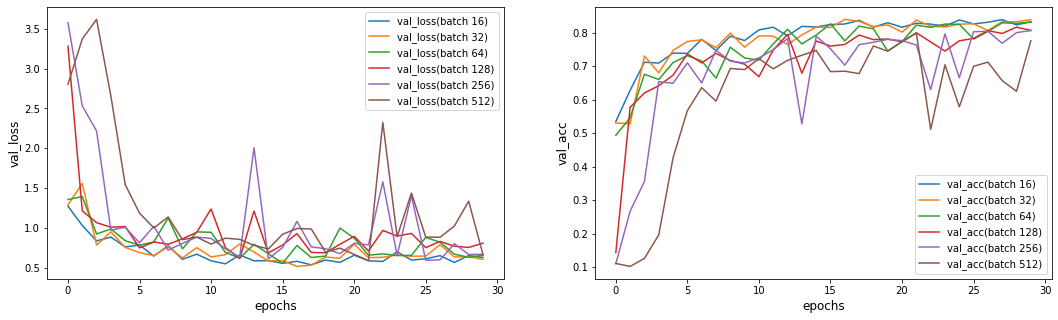

In [ ]:
fig, axs = plt.subplots(figsize=(18, 5), nrows=1, ncols=2)
for i in range(len(batch_size)):
  axs[0].plot(histories[i].history['val_loss'], label=f'val_loss(batch {batch_size[i]})')
  axs[1].plot(histories[i].history['val_accuracy'], label=f'val_acc(batch {batch_size[i]})')
  
  axs[0].legend()
  axs[0].set_xlabel('epochs', fontsize=12)
  axs[0].set_ylabel('val_loss', fontsize=12)

  axs[1].legend()
  axs[1].set_xlabel('epochs', fontsize=12)
  axs[1].set_ylabel('val_acc', fontsize=12)

### **5. Evaluate the model**

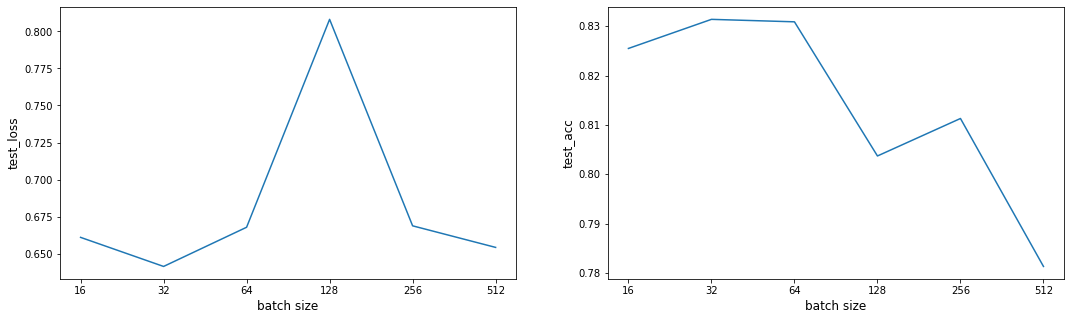

In [ ]:
fig, axs = plt.subplots(figsize=(18, 5), nrows=1, ncols=2)
batch_size = list(map(str, batch_size))
axs[0].plot(batch_size, test_losss)
axs[1].plot(batch_size, test_accs)

axs[0].set_xlabel('batch size', fontsize=12)
axs[0].set_ylabel('test_loss', fontsize=12)

axs[1].set_xlabel('batch size', fontsize=12)
axs[1].set_ylabel('test_acc', fontsize=12)
plt.show()